En el apartado "Loading Data" de esta URL:

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

Se explica cómo se cargan una serie de datos: 

1. Utiliza esa misma forma para cargar los datos.
2. Limpia los datos si es necesario
3. Dibuja con plotly los que creas necesarios gráficos para entender los datos.
4. Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados? 
5. Intenta superarte en el score cambiando las features de los algoritmos.

In [11]:
import sys
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import datasets
from xgboost import XGBRegressor,XGBClassifier
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
sys.path.append('C:\\DATA_SCIENCE')
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, RobustScaler, Normalizer, PolynomialFeatures, MinMaxScaler
from LIBRARY.Libreria_Folders_DVG import *
from LIBRARY.Libreria_Pandas_DVG import *
from LIBRARY.Libreria_ML_DVG import *
from LIBRARY.Libreria_Maths_DVG import *
from LIBRARY.Libreria_Graphs_DVG import *

In [3]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [4]:
X = cancer.data
y = cancer.target

In [5]:
X.shape, y.shape

((569, 30), (569,))

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=4600)

LR: -0.060501 (0.025194)
KNN: -0.097830 (0.032168)
DTR: -0.076958 (0.026386)
RFR: -0.047256 (0.025598)
SVC: -0.162591 (0.073751)
[18:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly 

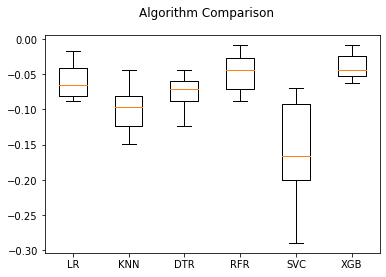

In [12]:
seed = 4600

# prepare models
models = []
models.append(('LR', LogisticRegression(n_jobs=-2)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=2)))
models.append(('DTR', DecisionTreeClassifier()))
models.append(('RFR', RandomForestClassifier(n_estimators = 10)))
models.append(('SVC', LinearSVC()))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
    
    kfold = RepeatedKFold(n_splits=4, n_repeats= 2, random_state=seed)

       
    cv_results = cross_val_score(model, X_train, y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison 
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## We must discard XGBoostClassifier due to a version error; the following best model is RandomForestClassifier. We try different n_estimators to check its effects on score.

In [12]:
estimators = [1, 3, 5, 7, 10, 12, 15, 17, 20, 30, 50, 70, 100, 500, 700, 1000]

In [25]:
estim_dict = {}
for x in estimators:
    rf = RandomForestClassifier(n_estimators = x, random_state=150)
    rf.fit(X_train, y_train)
    s = rf.score(X_test, y_test)
    estim_dict[x] = s    
    print('n_estimators:', x, 'score', rf.score(X_test, y_test))

n_estimators: 1 score 0.8947368421052632
n_estimators: 3 score 0.9298245614035088
n_estimators: 5 score 0.9210526315789473
n_estimators: 7 score 0.9298245614035088
n_estimators: 10 score 0.9385964912280702
n_estimators: 12 score 0.9473684210526315
n_estimators: 15 score 0.956140350877193
n_estimators: 17 score 0.9649122807017544
n_estimators: 20 score 0.956140350877193
n_estimators: 30 score 0.956140350877193
n_estimators: 50 score 0.9473684210526315
n_estimators: 70 score 0.956140350877193
n_estimators: 100 score 0.9649122807017544
n_estimators: 500 score 0.9473684210526315
n_estimators: 700 score 0.9473684210526315
n_estimators: 1000 score 0.9473684210526315


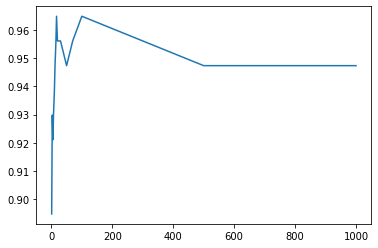

In [26]:
plt.plot(estim_dict.keys(), estim_dict.values())

In [16]:
rf = RandomForestClassifier()
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

## TRYING PARAMS GRID FOR RANDOMFOREST CLASSIFIER

In [22]:
%%time

params = {"max_features"  : ['auto', 'sqrt', 'log2'] ,
 "max_depth": [4, 5, 7],
 "min_impurity_decrease" : [0.0, 0.1, 0.3, 0.5],
 "warm_start"            : ['True', 'False'],
 "criterion" : ['gini', 'entropy']}

search_space = [params]


cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=5)
# Create grid search 
clf = GridSearchCV(estimator= rf, param_grid=search_space, cv=cv, verbose=3, n_jobs=-2)

# Fit grid search
best_model = clf.fit(X_train, y_train)

# View best model
separator = "\n############################\n"
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits

############################

clf.best_params_ {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_impurity_decrease': 0.0, 'warm_start': 'True'}

############################

clf.best_score 0.964835164835165
Wall time: 26.4 s


In [18]:
kn = KNeighborsClassifier()
kn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

## TRYING PARAMS GRID FOR KNN

In [21]:
%%time

params = {'n_neighbors' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
'weights' : ['uniform', 'distance']}

search_space = [params]


cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=5)
# Create grid search 
clf = GridSearchCV(estimator=kn, param_grid=search_space, cv=cv, verbose=3, n_jobs=-2)

# Fit grid search
best_model = clf.fit(X_train, y_train)

# View best model
separator = "\n############################\n"
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits

############################

clf.best_params_ {'n_neighbors': 10, 'weights': 'uniform'}

############################

clf.best_score 0.9274725274725275
Wall time: 136 ms


## TRYING PARAMS GRID FOR LOGISTIC REGRESSION

In [11]:
lg = LogisticRegression()

In [14]:
%%time

params = {"penalty"  : ['l1', 'l2', 'elasticnet', 'none'],
'C' : [0.0, 0,1, 0,2, 0.5, 0.7, 1],
 'solver' : ['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']}

search_space = [params]


cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=5)
# Create grid search 
clf = GridSearchCV(estimator=lg, param_grid=search_space, cv=cv, verbose=3, n_jobs=-2)

# Fit grid search
best_model = clf.fit(X_train, y_train)

# View best model
separator = "\n############################\n"
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits

############################

clf.best_params_ {'C': 0.0, 'penalty': 'none', 'solver': 'newton-cg'}

############################

clf.best_score 0.9549450549450549
Wall time: 3.72 s


In [14]:
sv = LinearSVC()
sv.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

## TRYING PARAMS GRID FOR SVC

In [18]:
%%time

params = {"penalty"  : ['l1', 'l2'],
'C' : [0.0, 0,1, 0,2, 0.5, 0.7, 1],
'multi_class' : ['ovr', 'crammer_singer'],
'max_iter' : [500, 1000, 2000]}

search_space = [params]


cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=5)
# Create grid search 
clf = GridSearchCV(estimator=sv, param_grid=search_space, cv=cv, verbose=3, n_jobs=-2)

# Fit grid search
best_model = clf.fit(X_train, y_train)

# View best model
separator = "\n############################\n"
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)

Fitting 10 folds for each of 96 candidates, totalling 960 fits

############################

clf.best_params_ {'C': 1, 'max_iter': 1000, 'multi_class': 'crammer_singer', 'penalty': 'l2'}

############################

clf.best_score 0.932967032967033
Wall time: 1min 39s
